#ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK


## OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner code, texte et graphiques.

Cet outil est formidable pour plusieurs raisons:

+ Il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'une instruction, de la corriger si nécessaire.
+ Il permet aussi de rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ Il est possible d'ajouter des graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandé.

Et gardez à l'esprit qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



## Etape 1 - Importation des librairies et chargement des fichiers

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
# Importation de la librairie Pandas
import pandas as pd
# Imporation de la librairie numpy
import numpy as np

In [3]:
# Importation de la librairie plotly express
import plotly.express as px

In [4]:
# Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
# Saisir dans Google les mots clés "display all columns dataframe Pandas" par exemple.
# Dans les résultats de la recherche, privilégier les solutions provenant de Stack Overflow ou Medium
# source trouvée https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe
pd.set_option('display.max_columns', None)
test_df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
print(test_df)

   col1  col2
0     1     3
1     2     4


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Téléchargement / Chargements des fichiers</h3>
</div>

In [5]:
import os

# Déclaration des constantes des fichiers data
WEB_FILE = "/content/data/web.xlsx"
ERP_FILE = "/content/data/erp.xlsx"
LIAISON_FILE = "/content/data/liaison.xlsx"

# Check if data directory and files exist
if not (os.path.exists("/content/data") and os.path.exists(WEB_FILE) and os.path.exists(ERP_FILE) and os.path.exists(LIAISON_FILE)):
    # Téléchargement du fichier archive rar depuis le lien OC
    !wget https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/805_Business_Intelligence+_Analyst_V2/P6_BIA_V2/Data+Bottleneck.rar
    # Creation du dossier data
    !mkdir /content/data
    # Décompression du fichier archive
    !unrar x /content/Data+Bottleneck.rar /content/data/
    # Nettoyage du fichier archive
    !rm /content/Data+Bottleneck.rar
    print("Data downloaded and extracted.")
else:
    print("Data already exists.")

--2025-11-05 18:47:19--  https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/805_Business_Intelligence+_Analyst_V2/P6_BIA_V2/Data+Bottleneck.rar
Resolving s3.eu-west-1.amazonaws.com (s3.eu-west-1.amazonaws.com)... 52.218.116.24, 3.5.64.31, 52.92.19.40, ...
Connecting to s3.eu-west-1.amazonaws.com (s3.eu-west-1.amazonaws.com)|52.218.116.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 389869 (381K) [binary/octet-stream]
Saving to: ‘Data+Bottleneck.rar’

Data+Bottleneck.rar 100%[===================>] 380.73K   382KB/s    in 1.0s    

2025-11-05 18:47:21 (382 KB/s) - ‘Data+Bottleneck.rar’ saved [389869/389869]


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Data+Bottleneck.rar

Extracting  /content/data/erp.xlsx                                         9%  OK 
Extracting  /content/data/liaison.xlsx                                    14%  OK 
Extracting  /content/data/web.xlsx   

In [6]:
#Importation du fichier web.xlsx
df_web = pd.read_excel(WEB_FILE)
#Importation du fichier erp.xlsx
df_erp = pd.read_excel(ERP_FILE)
#Importation du fichier liaison.xlsx
df_liaison = pd.read_excel(LIAISON_FILE)

# test des dataFrame sur les 3 premiere entrées :
print("Dataframe WEB : \n",df_web.head(3))
print("Dataframe ERP : \n",df_erp.head(3))
print("Dataframe LIAISON : \n",df_liaison.head(3))

Dataframe WEB : 
      sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0  11862        0             0             0             0.0          3.0   
1  16057        0             0             0             0.0          5.0   
2  14692        0             0             0             0.0          5.0   

  tax_status  tax_class  post_author           post_date       post_date_gmt  \
0        NaN        NaN          2.0 2018-02-12 13:46:23 2018-02-12 12:46:23   
1        NaN        NaN          2.0 2018-04-17 15:29:17 2018-04-17 13:29:17   
2    taxable        NaN          2.0 2019-03-19 10:06:47 2019-03-19 09:06:47   

   post_content product_type  \
0           NaN          Vin   
1           NaN          Vin   
2           NaN          Vin   

                                          post_title  \
0                  Gilles Robin Hermitage Rouge 2012   
1  Domaine Pellé Sancerre Rouge La Croix Au Garde...   
2      Château Fonréaud Bordeaux Blanc Le Cygne 201

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)



##Etape 2 - Analyse exploratoire des fichiers</h2>



###2.1 - Analyse exploratoire du fichier erp.xlsx


In [7]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [8]:
#Consulter le nombre de colonnes
print("Nombre de colonnes dans erp : ",df_erp.columns.size)
#La nature des données dans chacune des colonnes
print("\nNature des données dans chacune des colonnes : \n",df_erp.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chacune des colonnes : \n",df_erp.count())


Nombre de colonnes dans erp :  6

Nature des données dans chacune des colonnes : 
 product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes : 
 product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [9]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [10]:
#Vérifier si il y a des lignes en doublon dans la colonne product_id
df_erp.duplicated(subset=['product_id']).any()

np.False_

In [11]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp['stock_status'].unique()
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
# A stock_quantity

array(['instock', 'outofstock'], dtype=object)

In [12]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#Si la valeur de la colonne "stock_quantity" est nulle, renseigner "outofstock" sinon mettre "instock"

df_erp['stock_status_2'] = np.where(
    (df_erp['stock_quantity'].isnull()) | (df_erp['stock_quantity'] == 0)| (df_erp['stock_quantity'] < 0),
    'outofstock',
    'instock'
)
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock


In [13]:
#Vérifions que les 2 colonnes sont identiques:
df_erp["stock_status"] == df_erp["stock_status_2"]

#difficile à exploiter

,0
0,True
1,True
2,True
3,True
4,False
...,...
820,True
821,True
822,True
823,True


https://bitbucket.org/hrojas/learn-pandas/src/master/

In [14]:
# Create a boolean Series for rows where the two columns are different
condition = df_erp['stock_status'] != df_erp['stock_status_2']

filtered_df = df_erp[condition]

# Option simple
result_df = filtered_df[['stock_quantity', 'stock_status', 'stock_status_2']]
# Option compliqué
filter_bool = df_erp.groupby('product_id').filter(lambda x: (x['stock_status'] != x['stock_status_2']).all())

# print(filter_bool)
print(result_df)

     stock_quantity stock_status stock_status_2
4                 3   outofstock        instock
398               0      instock     outofstock


In [15]:
condition = df_erp['stock_status'] != df_erp['stock_status_2']
filtered_df = df_erp[condition]
print("Before repair : \n",result_df)


# Only grab where stock_status == outofstock
mask = df_erp.groupby('product_id').filter(lambda x: ((x['stock_quantity'] < 0) | (x['stock_quantity'] == 0) | (x['stock_quantity'].isna())  | (x['stock_status'] == '')).all())
# print(mask.head(5))
df_erp.loc[mask.index, "stock_status"] = df_erp['stock_status_2'] # Nouvelle forme de correction dl.loc[mask, "colonne"] = 'nouvelleValeur', la forme df['colonne'][mask] = 'nouvelleValeur' est obsolète

condition = df_erp['stock_status'] != df_erp['stock_status_2']
filtered_df = df_erp[condition]
result_df = filtered_df[['stock_quantity', 'stock_status', 'stock_status_2']]
print("\nAfter repair : \n",result_df)
del df_erp['stock_status_2']
df_erp.head(5)

Before repair : 
      stock_quantity stock_status stock_status_2
4                 3   outofstock        instock
398               0      instock     outofstock

After repair : 
    stock_quantity stock_status stock_status_2
4               3   outofstock        instock


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


#### 2.1.1 Analyse exploratoire de chaque variable du fichier erp.xlsx


##### 2.1.1.1 - Analyse de la variable PRIX

In [16]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatifs ou nuls?
#Afficher le ou les prix non renseignés dans la colonne "price"
mask = df_erp.price.isnull() | (df_erp.price < 0) | df_erp.price.isna()
# print(mask)
print("\nNombres d'articles avec un prix non renseigné: \n{}".format(df_erp[mask])) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("\nPrix minimum: {}".format(df_erp.price.min()))
#Afficher le prix maximum de la colonne "price"
print("\nPrix maximum: {}".format(df_erp.price.max()))

#Afficher les prix inférieurs à 0 (qu'est-ce qu'il faut en faire ?) il faut certainement les corriger
print("\nPrix négatif: \n{}".format(df_erp.groupby('product_id').filter(lambda x : x['price'] < 0)))

# Afficher le rapport avg((price+tva)/purchase_price) pour se faire une idée de la marge moyenne par produit. Cet indicateur servira pour corriger les prix null ou négatif.
tva = 0
df_erp_positiv = df_erp.groupby('product_id').filter(lambda x : x['price'] > 0) # data of only positiv price
df_erp_positiv['marge'] = (df_erp_positiv['price'] / (df_erp_positiv['purchase_price'] + (df_erp_positiv['price'] * 0.2))).round(2)
marge = round(df_erp_positiv['marge'].mean(),2)
print("\nRapport avg(price+/(purchase_price+tva20%)): \n{}".format(marge))

# print("\nRapport avg((price+tva)/purchase_price): \n{}".format(df_erp.groupby('product_id').apply(lambda x : ((x['price']+tva)/x['purchase_price']))))


Nombres d'articles avec un prix non renseigné: 
     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price  
151           10.33  
469            4.34  
739            4.61  

Prix minimum: -20.0

Prix maximum: 225.0

Prix négatif: 
     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price  
151           10.33  
469            4.34  
739            4.61  

Rapport avg(price+/(purchase_price+tva20%)): 
1.39


###### Correction des données prix négatives

In [17]:
mask = df_erp.price.isnull() | (df_erp.price < 0) | df_erp.price.isna() # Selection de seulement des lignes négative
df_erp.loc[mask, "price"] = df_erp['purchase_price'] * marge # on affecte le produit du prix d'achat fournisseur par la marge moyenne.

# Une amélioration aurait été de scale la marge par rapport au prix produit avec un facteur x car il est certain qu'un produit rare et luxueux est plus marger.
print("\nNombres d'articles avec un prix non renseigné: \n{}".format(df_erp[mask])) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("\nPrix minimum: {}".format(df_erp.price.min()))
#Afficher le prix maximum de la colonne "price"
print("\nPrix maximum: {}".format(df_erp.price.max()))


Nombres d'articles avec un prix non renseigné: 
     product_id  onsale_web    price  stock_quantity stock_status  \
151        4233           0  14.3587               0   outofstock   
469        5017           0   6.0326               0   outofstock   
739        6594           0   6.4079              19      instock   

     purchase_price  
151           10.33  
469            4.34  
739            4.61  

Prix minimum: 5.2

Prix maximum: 225.0


#####2.1.1.2 - Analyse de la variable STOCK</h3>


In [18]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("\nstock minimum: {}".format(df_erp.stock_quantity.min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("\nstock maximum: {}".format(df_erp.stock_quantity.max()))
#Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
mask = df_erp.stock_quantity.isnull() | (df_erp.stock_quantity < 0) | df_erp.stock_quantity.isna() # Selection de seulement des lignes négative
print("\nNombres d'articles avec un stock incorrect: \n{}".format(df_erp[mask])) #Saisir l'instruction manquante dans la fonction format




stock minimum: -10

stock maximum: 145

Nombres d'articles avec un stock incorrect: 
     product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price  
449            4.96  
573           22.30  


###### Correction de la data stock_quantity

In [19]:
df_erp.loc[mask, "stock_quantity"] = 0 # on affecte 0 aux stock quantity négative qui sont outofstock
#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("\nstock minimum: {}".format(df_erp.stock_quantity.min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("\nstock maximum: {}".format(df_erp.stock_quantity.max()))
#Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
mask = df_erp.stock_quantity.isnull() | (df_erp.stock_quantity < 0) | df_erp.stock_quantity.isna() # Selection de seulement des lignes négative
print("\nNombres d'articles avec un stock incorrect: \n{}".format(df_erp[mask])) #Saisir l'instruction manquante dans la fonction format


stock minimum: 0

stock maximum: 145

Nombres d'articles avec un stock incorrect: 
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []


#####2.1.1.3 - Analyse de la variable ONSALE_WEB

In [20]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient. Que signifient-elles?
print("\nonsale_web info: {}".format(df_erp['onsale_web'].info()))
#Vérification de la colonne stock onsale_web
#Afficher la quantité minimum de la colonne "stock_quantity"
print("\nonsale_web minimum: {}".format(df_erp.onsale_web.min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("\nonsale_web maximum: {}".format(df_erp.onsale_web.max()))


<class 'pandas.core.series.Series'>
RangeIndex: 825 entries, 0 to 824
Series name: onsale_web
Non-Null Count  Dtype
--------------  -----
825 non-null    int64
dtypes: int64(1)
memory usage: 6.6 KB

onsale_web info: None

onsale_web minimum: 0

onsale_web maximum: 1


ONSALE_WEB est un indicateur booleen 0 le produit n'est pas en vente en ligne et 1 le produit est en vente en ligne

**Quelles sont les colonnes à conserver selon vous?** <br>
Si on transpose le dataframe df_erp à une BDD SQL alors l'attribut stock_status ne respect pas la norme 3_NF puisqu'elle peut être déduis depuis sotck quantity


In [21]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante
#avec la colonne "stock_status".
# Already done with del df_erp['stock_status_2'] after repairing stock_status.

#####2.1.1.4 - Analyse de la variable prix d'achat</h3>


In [22]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
print("\npurchase_price info: {}".format(df_erp['purchase_price'].info()))
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
mask = df_erp.purchase_price.isnull() | (df_erp.purchase_price < 0) | df_erp.purchase_price.isna()
# print(mask)
print("\nNombres d'articles avec un purchase_price non renseigné: \n{}".format(df_erp[mask])) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "purchase_price"
print("\nPrix minimum: {}".format(df_erp.purchase_price.min()))
#Afficher le prix maximum de la colonne "purchase_price"
print("\nPrix maximum: {}".format(df_erp.purchase_price.max()))



<class 'pandas.core.series.Series'>
RangeIndex: 825 entries, 0 to 824
Series name: purchase_price
Non-Null Count  Dtype  
--------------  -----  
825 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB

purchase_price info: None

Nombres d'articles avec un purchase_price non renseigné: 
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []

Prix minimum: 2.74

Prix maximum: 137.81


###2.2 - Analyse exploratoire du fichier web.xlsx</h3>


In [23]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))
#Consulter le nombre de colonnes
print("Nombre de colonnes dans erp : ",df_web.columns.size)
#La nature des données dans chacune des colonnes
print("\nNature des données dans chacune des colonnes : \n",df_web.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chacune des colonnes : \n",df_web.count())

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)
Nombre de colonnes dans erp :  29

Nature des données dans chacune des colonnes : 
 sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            dat

In [24]:
print("\nNombre de valeurs présentes dans chacune des colonnes : \n",df_web.head(3))


Nombre de valeurs présentes dans chacune des colonnes : 
      sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0  11862        0             0             0             0.0          3.0   
1  16057        0             0             0             0.0          5.0   
2  14692        0             0             0             0.0          5.0   

  tax_status  tax_class  post_author           post_date       post_date_gmt  \
0        NaN        NaN          2.0 2018-02-12 13:46:23 2018-02-12 12:46:23   
1        NaN        NaN          2.0 2018-04-17 15:29:17 2018-04-17 13:29:17   
2    taxable        NaN          2.0 2019-03-19 10:06:47 2019-03-19 09:06:47   

   post_content product_type  \
0           NaN          Vin   
1           NaN          Vin   
2           NaN          Vin   

                                          post_title  \
0                  Gilles Robin Hermitage Rouge 2012   
1  Domaine Pellé Sancerre Rouge La Croix Au Garde...   
2      Châ

**Selon vous, quelles sont les colonnes à conserver ?**
ça dépend de l'objectif mais de bases toutes les colonnes vides, redondantes ou celles qui peuvent être déduite et ou celles qui ne sont pas relatives à une analyse de vente.

En france la tva est de 20% sur la vente de vin et a la vente les prix vendu sont TTC pour tous les résidents français. --> https://www.vinsgrandscrus.fr/fiscalite-vins

**colonnes doublon | déductible |  inutile | vide** :
- tax_class
- post_content
- post_password
- post_content_filtered
- post_date_gmt
- post_author
- post_excerpt
- comment_count
- guid
- comment_status
- ping_status
- post_status
- post_modified_gmt
- menu_order
- post_type

In [25]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web_clean = df_web.drop(['tax_class', 'post_content', 'post_password', 'post_content_filtered',
                            'post_date_gmt', 'post_author', 'post_excerpt', 'comment_count', 'guid',
                            'comment_status', 'ping_status', 'post_status',
                            'post_modified_gmt', 'menu_order', 'post_type'], axis=1)
#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chacune des colonnes : \n",df_web_clean.count())


Nombre de valeurs présentes dans chacune des colonnes : 
 sku               1428
virtual           1513
downloadable      1513
rating_count      1513
average_rating    1430
total_sales       1430
tax_status         716
post_date         1430
product_type      1429
post_title        1430
post_name         1430
post_modified     1430
post_parent       1430
post_mime_type     714
dtype: int64


#### 2.2.1 Analyse exploratoire de chaque variable du fichier web.xlsx


##### 2.2.1.1 Analyse de la variable sku


In [26]:
#Visualisation des valeurs de la colonne sku
df_web_clean['sku'].info()


#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
mask = df_web_clean['sku'].isnull() | df_web_clean['sku'].isna() | (df_web_clean['sku'] == '') | (df_web_clean['sku'].str.startswith('-'))
nb_sku_incorrect = df_web_clean.shape[0] - df_web_clean['sku'].count() # count = Number of non-NA elements in a Series.
print("\nNombres d'articles avec un sku non renseigné: \n{}".format(nb_sku_incorrect))
print("\nArticles avec un sku non renseigné: \n{}".format(df_web_clean[mask]))

<class 'pandas.core.series.Series'>
RangeIndex: 1513 entries, 0 to 1512
Series name: sku
Non-Null Count  Dtype 
--------------  ----- 
1428 non-null   object
dtypes: object(1)
memory usage: 11.9+ KB

Nombres d'articles avec un sku non renseigné: 
85

Articles avec un sku non renseigné: 
      sku  virtual  downloadable  rating_count  average_rating  total_sales  \
8     NaN        0             0             0             NaN          NaN   
20    NaN        0             0             0             NaN          NaN   
30    NaN        0             0             0             NaN          NaN   
37    NaN        0             0             0             NaN          NaN   
41    NaN        0             0             0             NaN          NaN   
...   ...      ...           ...           ...             ...          ...   
1384  NaN        0             0             0             NaN          NaN   
1429  NaN        0             0             0             NaN          NaN   
1

###### Correction de la variable sku


In [27]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les
# Clean dataframe for sku Nan value
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
mask = df_web_clean['sku'].isnull() | df_web_clean['sku'].isna() | (df_web_clean['sku'] == '') | (df_web_clean['sku'].str.startswith('-'))
nb_sku_incorrect = df_web_clean.shape[0] - df_web_clean['sku'].count() # count = Number of non-NA elements in a Series.
print("\nNombres d'articles avec un sku non renseigné: \n{}".format(nb_sku_incorrect))
print("\nArticles avec un sku non renseigné: \n{}".format(df_web_clean[mask]))


Nombres d'articles avec un sku non renseigné: 
85

Articles avec un sku non renseigné: 
      sku  virtual  downloadable  rating_count  average_rating  total_sales  \
8     NaN        0             0             0             NaN          NaN   
20    NaN        0             0             0             NaN          NaN   
30    NaN        0             0             0             NaN          NaN   
37    NaN        0             0             0             NaN          NaN   
41    NaN        0             0             0             NaN          NaN   
...   ...      ...           ...           ...             ...          ...   
1384  NaN        0             0             0             NaN          NaN   
1429  NaN        0             0             0             NaN          NaN   
1432  NaN        0             0             0             NaN          NaN   
1445  NaN        0             0             0             NaN          NaN   
1457  NaN        0             0          

In [28]:
#La clé pour chaque ligne est-elle unique? autrement dit, y a-t-il des doublons?
# Verification des doublons sur l'id sku
isThereDoublon = df_web_clean.duplicated(subset=['sku']) == True
print("\nDoublon sur l'id sku \n{}".format(df_web_clean.duplicated(subset=['sku'])))
nb_doublon_sku = df_web_clean[isThereDoublon].shape[0]
print("\nNombres de doublon sur l'id sku \n{}".format(nb_doublon_sku))
print("\nPresence de doublon sur l'id sku : \n{}".format(df_web_clean[isThereDoublon]))
condition = df_web_clean['sku'] == 16326
print("\ndoublon sur l'id sku : 16326\n{}".format(df_web_clean[condition]))

# Correction
df_web_clean.drop_duplicates(subset=['sku'], inplace=True)

# Verification des doublons sur l'id sku
isThereDoublon = df_web_clean.duplicated(subset=['sku']) == True
print("\nDoublon sur l'id sku \n{}".format(df_web_clean.duplicated(subset=['sku'])))
nb_doublon_sku = df_web_clean[isThereDoublon].shape[0]
print("\nNombres de doublon sur l'id sku \n{}".format(nb_doublon_sku))
print("\nPresence de doublon sur l'id sku : \n{}".format(df_web_clean[isThereDoublon]))
condition = df_web_clean['sku'] == 16326
print("\ndoublon sur l'id sku : 16326\n{}".format(df_web_clean[condition]))


Doublon sur l'id sku 
0       False
1       False
2       False
3       False
4       False
        ...  
1508     True
1509     True
1510     True
1511     True
1512     True
Length: 1513, dtype: bool

Nombres de doublon sur l'id sku 
798

Presence de doublon sur l'id sku : 
        sku  virtual  downloadable  rating_count  average_rating  total_sales  \
20      NaN        0             0             0             NaN          NaN   
30      NaN        0             0             0             NaN          NaN   
37      NaN        0             0             0             NaN          NaN   
41      NaN        0             0             0             NaN          NaN   
47      NaN        0             0             0             NaN          NaN   
...     ...      ...           ...           ...             ...          ...   
1508  16326        0             0             0             0.0          5.0   
1509  15662        0             0             0             0.0         1

In [29]:
#Les lignes sans code article semblent être toutes non renseignées
#Pour s'en assurer, réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web_only_nan = df_web[df_web['sku'].isna()]
df_web_only_nan['sku'].info()
df_web_clean['sku'].info()


<class 'pandas.core.series.Series'>
Index: 85 entries, 8 to 1457
Series name: sku
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 1.3+ KB
<class 'pandas.core.series.Series'>
Index: 715 entries, 0 to 1391
Series name: sku
Non-Null Count  Dtype 
--------------  ----- 
714 non-null    object
dtypes: object(1)
memory usage: 11.2+ KB


**Que constatez-vous?**
on a l'information du nombre de valeur non null qui est égale à 0.




###2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>


In [30]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))
#Consulter le nombre de colonnes
print("Nombre de colonnes dans erp : ",df_liaison.columns.size)
#La nature des données dans chacune des colonnes
print("\nNature des données dans chacune des colonnes : \n",df_liaison.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chacune des colonnes : \n",df_liaison.count())

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)
Nombre de colonnes dans erp :  2

Nature des données dans chacune des colonnes : 
 id_web        object
product_id     int64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes : 
 id_web        734
product_id    825
dtype: int64


In [31]:
#Les valeurs de la colonne "product_id" sont-elles toutes uniques? Oui
df_liaison.duplicated(subset=['product_id']).any()

np.False_

In [32]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques? Non
isDoublons = df_liaison.duplicated(subset=['id_web']).any()
print("La colonne id_web a-t-elle des doublons : {}".format(isDoublons))

isNan = df_liaison['id_web'].isna().any()
print("La colonne id_web a-t-elle des valeur Nan : {}".format(isNan))

# Drop des valeur Nan
df_liaison_clean = df_liaison.dropna(subset=['id_web'])
isDoublons = df_liaison_clean.duplicated(subset=['id_web']).any()
print("La colonne id_web a-t-elle des doublons en dehors des Nan : {}".format(isDoublons))


La colonne id_web a-t-elle des doublons : True
La colonne id_web a-t-elle des valeur Nan : True
La colonne id_web a-t-elle des doublons en dehors des Nan : False


In [33]:
#Avons-nous des articles sans correspondance? Oui
mask = df_liaison['id_web'].isna() # mask de toutes les entrées de id_web Nan donc de produit sans correspondance web
print("Liste des articles sans correspondance web: \n{}".format(df_liaison[mask]))

Liste des articles sans correspondance web: 
    id_web  product_id
19     NaN        4055
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
..     ...         ...
817    NaN        7196
818    NaN        7200
819    NaN        7201
820    NaN        7203
821    NaN        7204

[91 rows x 2 columns]


##Etape 3 - Jonction des fichiers</h2>


###Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>


**La meilleure pratique pour fusionner deux DataFrames dépend de l'objectif :**

- Pour une union verticale (ajouter des lignes), utilisez pd.concat([df1, df2], ignore_index=True) ou pd.concat([df1, df2], axis=0). Cela combine les lignes des deux DataFrames.
- Pour une jointure horizontale (ajouter des colonnes selon des clés), utilisez pd.merge(df1, df2, on='col', how='...').

**Le paramètre how détermine le type de jointure :**

- 'outer' : Union complète (toutes les lignes, remplit avec NaN si manquant).
- 'inner' : Intersection (seules les lignes avec correspondance dans les deux).
- 'left' / 'right' : Garde toutes les lignes du DataFrame gauche ou droit.

In [34]:
#Fusion des fichiers df_erp et df_liaison
df_erp_liaison = pd.merge(df_erp, df_liaison, on='product_id', how='outer')

In [35]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers? Non
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp_liaison.shape[0]))
#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chacune des colonnes : \n",df_erp_liaison.count())
isNan = df_erp_liaison['product_id'].isna().any()
print("\nLa product_id id_web a-t-elle des valeur Nan : {}\n".format(isNan))
df_erp_liaison.info()
df_erp_liaison.head(3)



Le tableau comporte 825 observation(s) ou article(s)

Nombre de valeurs présentes dans chacune des colonnes : 
 product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
id_web            734
dtype: int64

La product_id id_web a-t-elle des valeur Nan : False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
 6   id_web          734 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 45.2+ KB


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
0,3847,1,24.2,16,instock,12.88,15298
1,3849,1,34.3,10,instock,17.54,15296
2,3850,1,20.8,0,outofstock,10.64,15300


###Etape 3.2 - Jonction du fichier df_erp_liaison et df_web</h3>


Si les clés de fusion ont des noms différents entre les deux DataFrames, utilisez les paramètres `left_on` et `right_on` dans `pd.merge()` :

```python
pd.merge(df1, df2, left_on='nom_col_df1', right_on='nom_col_df2', how='...')
```

Par exemple :
```python
pd.merge(df_gauche, df_droite, left_on='id_client', right_on='client_id')
```

Cela permet de joindre les DataFrames même si les colonnes de jointure portent des noms différents.



In [36]:
#Fusionner les datasets df_erp_liaison et df_web
# Filter df_web to only include rows where 'post_type' is 'product'
df_web_products = df_web[df_web['post_type'] == 'product']

# Drop rows with NaN in the 'sku' column from df_web_products
df_web_products_filtered = df_web_products.dropna(subset=['sku'])
# colonnes à supprimer, effectuer l'opération
df_web_products_filtered.drop(['tax_class', 'post_content', 'post_password',
                            'post_content_filtered', 'post_mime_type'], axis=1, inplace=True)

df_erp_liaison_web = pd.merge(df_erp_liaison, df_web_products_filtered, left_on='id_web', right_on='sku', how='left')

/tmp/ipython-input-1055263862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web_products_filtered.drop(['tax_class', 'post_content', 'post_password',


In [37]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp_liaison_web.shape[0]))
#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chacune des colonnes : \n",df_erp_liaison_web.count())
isNan = df_erp_liaison_web['id_web'].isna().any()
print("\nLa id_web id_web a-t-elle des valeur Nan : {}\n".format(isNan))
isDoublons = df_liaison.duplicated(subset=['product_id']).any()
print("\nLa colonne id_web a-t-elle des doublons : {}\n".format(isDoublons))
df_erp_liaison_web.info()
df_erp_liaison_web[['product_id', 'id_web', 'sku']].head(3)

Le tableau comporte 825 observation(s) ou article(s)

Nombre de valeurs présentes dans chacune des colonnes : 
 product_id           825
onsale_web           825
price                825
stock_quantity       825
stock_status         825
purchase_price       825
id_web               734
sku                  714
virtual              714
downloadable         714
rating_count         714
average_rating       714
total_sales          714
tax_status           714
post_author          714
post_date            714
post_date_gmt        714
product_type         713
post_title           714
post_excerpt         714
post_status          714
comment_status       714
ping_status          714
post_name            714
post_modified        714
post_modified_gmt    714
post_parent          714
guid                 714
menu_order           714
post_type            714
comment_count        714
dtype: int64

La id_web id_web a-t-elle des valeur Nan : True


La colonne id_web a-t-elle des doublons : False



,product_id,id_web,sku
0,3847,15298,15298
1,3849,15296,15296
2,3850,15300,15300


In [38]:
#Avons-nous des lignes sans correspondance? Oui
mask = df_erp_liaison_web['id_web'].isna()
isNan = df_erp_liaison_web['id_web'].isna().any()
print("\nLa liste de produit a-t-elle pour correspondance d'id_web des valeur Nan : {}\n".format(isNan))

df_erp_liaison_web_filtered = df_erp_liaison_web[mask]
print("\nListe de produit sans correspondance web : \n{}".format(df_erp_liaison_web_filtered[['product_id', 'id_web', 'sku']].head(3)))

# Si désiré voici le tableau avec seulement les correspondaces :
df_erp_liaison_web_filtered = df_erp_liaison_web.dropna(subset=['id_web', 'sku'])

isDifferent = (df_erp_liaison_web_filtered['id_web'] != df_erp_liaison_web_filtered['sku']).any()
print("\nLa colonne id_web est elle toujours égale à sku : {}\n".format(not isDifferent))

if (not isDifferent):
    df_erp_liaison_web_filtered = df_erp_liaison_web_filtered.drop('sku', axis=1) # suppression de la redondance id_web, sku

print("\nListe de produit sans correspondance web : \n{}".format(df_erp_liaison_web_filtered[['product_id', 'id_web']].head(3)))

isNan = df_erp_liaison_web_filtered['id_web'].isna().any()
print("\nLa liste filtré de produit a-t-elle pour correspondance d'id_web des valeur Nan : {}\n".format(isNan))


La liste de produit a-t-elle pour correspondance d'id_web des valeur Nan : True


Liste de produit sans correspondance web : 
    product_id id_web  sku
19        4055    NaN  NaN
49        4090    NaN  NaN
50        4092    NaN  NaN

La colonne id_web est elle toujours égale à sku : True


Liste de produit sans correspondance web : 
   product_id id_web
0        3847  15298
1        3849  15296
2        3850  15300

La liste filtré de produit a-t-elle pour correspondance d'id_web des valeur Nan : False



##Etape 4 - Analyse univariée des prix</h2>


###Etape 4.1 - Exploration par la visualisation de données</h3>


Pour créer une boîte à moustache (boxplot) de la répartition des prix avec pandas, utilisez la méthode `boxplot()` :

```python
df.boxplot(column='prix')
```

- Remplacez `'prix'` par le nom de votre colonne de prix.
- Cette méthode affiche automatiquement la médiane, les quartiles, les moustaches et les valeurs aberrantes.
- Pour plusieurs colonnes : `df.boxplot(column=['prix1', 'prix2'])`



<Axes: >

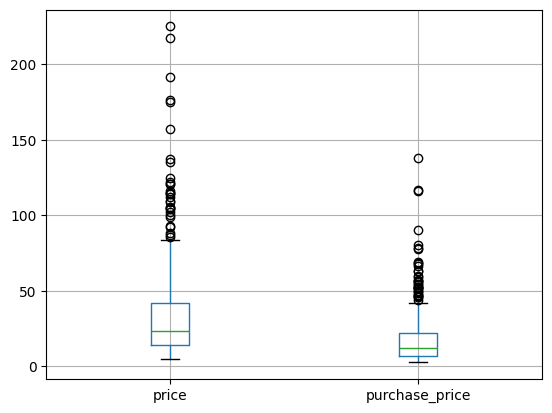

In [39]:
#Création d'une boîte à moustache de la répartition des prix grâce à Pandas
# df_erp_liaison_web_filtered.columns
df_erp_liaison_web_filtered.boxplot(column=['price','purchase_price'])

Pour créer une boîte à moustache avec **Plotly Express**, utilisez `px.box()` :

```python
import plotly.express as px

fig = px.box(df, y='prix')
fig.show()
```

- Utilisez `x` pour une orientation horizontale.
- Ajoutez `points='all'` pour afficher tous les points.
- Pour des groupes : `px.box(df, y='prix', color='categorie')`.

Pour comparer plusieurs colonnes de prix (ex. prix d'achat et prix de vente) avec **Plotly Express**, utilisez `px.box()` après avoir transformé les données au format long avec `melt()` :

```python
import plotly.express as px

fig = px.box(df.melt(value_vars=['prix_achat', 'prix_vente']),
             x='variable', y='value',
             points='outliers')
fig.show()
```

Cela affiche une boîte à moustache pour chaque colonne, permettant une comparaison claire de la distribution.



In [40]:
#Autre méthode avec plotly express
fig = px.box(df_erp_liaison_web_filtered.melt(value_vars=['price', 'purchase_price']),
             x='variable', y='value',
             points='outliers')
fig.show()


###Etape 4.2 - Exploration par l'utilisation de méthodes statistiques</h3>

####Etape 4.2.1 - Identification par le Z-index</h3>


Le **z-score** (ou score standard) mesure **combien d'écarts-types** une valeur est au-dessus ou en dessous de la **moyenne** d’un groupe de valeurs.

- **Formule** :  
  $$
  z = \frac{(X - \mu)}{\sigma}
  $$
  où $X$ est la valeur, $\mu$ la moyenne, et $\sigma$ l’écart-type.

- Un z-score de **0** signifie que la valeur est égale à la moyenne.
- Un z-score de **+2** indique une valeur à 2 écarts-types **au-dessus** de la moyenne.
- Un z-score de **-1.5** signifie 1.5 écart-type **en dessous**.

Il est utilisé pour :
- Comparer des données de différentes distributions.
- Identifier des **valeurs aberrantes** (souvent si |z| > 3).
- Normaliser des données.



In [69]:
#Calculer la moyenne du prix
moyenne_price = df_erp_liaison_web_filtered['price'].mean()

#Calculer l'écart-type du prix
ecart_type = df_erp_liaison_web_filtered['price'].std()

#Calculer le Z-score (df_erp_liaison_web_filtered['price'] - moyenne_price) / ecart_type
fig = px.scatter(df_erp_liaison_web_filtered,
                 x='price',
                 y=(df_erp_liaison_web_filtered['price'] - moyenne_price) / ecart_type,
                 labels={'y': 'Z-score', 'x': 'Prix'},
                 title='Relation entre le prix et son Z-score')
fig.add_hline(y=0, line_dash="dash", line_color="red")  # Ligne à z=0 (moyenne)
fig.add_hline(y=3, line_dash="dash", line_color="blue")  # Ligne à z=3 (Ecart important)

fig.show()

In [42]:
#Quel est le seuil prix dont le z-score est supérieur à 3? 116.4
condition = (df_erp_liaison_web_filtered['price'] - moyenne_price) / ecart_type > 3
filter = df_erp_liaison_web_filtered[condition].sort_values(by='price', ascending=True)
filter['price']

,price
703,116.4
709,121.0
712,121.0
651,122.0
556,124.8
697,135.0
411,137.0
230,157.0
598,175.0
227,176.0


####Etape 4.2.2 - Identification par l'intervalle interquartile</h3>


L'**étude des mesures de dispersion** permet d'évaluer **la variabilité** des données autour d'une valeur centrale (comme la moyenne). Elles sont essentielles car deux séries peuvent avoir la même moyenne mais des comportements très différents.

#### Principales mesures de dispersion :
1. **Étendue** : Différence entre la valeur maximale et minimale.
2. **Écart interquartile (Q3 - Q1)** : Mesure la dispersion du 25e au 75e percentile, robuste aux valeurs extrêmes.
3. **Variance** : Moyenne des carrés des écarts à la moyenne.
4. **Écart-type** : Racine carrée de la variance, exprimée dans la même unité que les données.
5. **Écart moyen** : Moyenne des écarts absolus à la moyenne.

Ces mesures complètent les **indicateurs de tendance centrale** (moyenne, médiane) pour offrir une description plus complète de la distribution.

exemple simple pour illustrer les mesures de dispersion :

**Série de notes** : 8, 10, 12, 14, 16  
- **Moyenne** : 12  
- **Étendue** : 16 – 8 = **8**  
- **Écart interquartile (Q3 – Q1)** : 14 – 10 = **4**  
- **Écart-type** ≈ **2,83** (chaque note s’écarte en moyenne de 2,83 points de la moyenne)

→ Ces mesures montrent que les notes sont modérément dispersées autour de la moyenne.

Voici un exemple montrant deux séries avec **la même moyenne** mais des **dispersions très différentes** :

**Série A (notes stables)** : 11, 12, 11, 13, 13 → Moyenne = **12**  
- Écart-type ≈ **0,9** (peu dispersé)

**Série B (notes irrégulières)** : 6, 8, 12, 16, 18 → Moyenne = **12**  
- Écart-type ≈ **4,5** (fortement dispersé)

→ Les deux ont une moyenne de 12, mais **Série B** varie beaucoup plus, ce que révèle l’écart-type.



https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [43]:
#Utilisation de la fonction "describe" de Pandas pour l'étude des mesures de dispersion
desc = df_erp_liaison_web_filtered[['price']].describe()
print("\nLes résultats statistiques avec describe pour le prix de ventes sont : \n{}\n".format(desc))


Les résultats statistiques avec describe pour le prix de ventes sont : 
            price
count  714.000000
mean    32.333683
std     27.596332
min      5.200000
25%     14.062500
50%     23.450000
75%     42.075000
max    225.000000



Identifier les articles outliers en prix, une approche courante consiste à utiliser l'intervalle interquartile (IQR). Cette méthode repose sur le calcul du premier quartile (Q1) et du troisième quartile (Q3) de la distribution des prix. L'intervalle interquartile est alors défini comme la différence entre Q3 et Q1, soit IQR=Q3−Q1.
 Les limites inférieure et supérieure du seuil sont ensuite déterminées en multipliant l'IQR par 1,5 et en l'ajoutant ou en le soustrayant à Q1 et Q3 respectivement. Ainsi, la limite inférieure est donnée par Q1−1.5×IQR et la limite supérieure par Q3+1.5×IQR.

In [44]:
#Définir un seuil pour les articles "outliers" en prix
# seuil limite supérieur
iqr = desc.loc['75%', 'price'] - desc.loc['25%', 'price'] # 42- 14 = 28
# seuil limite inférieur
lower_bound = desc.loc['25%', 'price'] - 1.5 * iqr # 14 - 1.5 * 28 = -28
lower_bound = max(0, desc.loc['25%', 'price'] - 1.5 * iqr)  # Ajuster à 0 si négatif
upper_bound = desc.loc['75%', 'price'] + 1.5 * iqr

print(f"seuil limite inférieur outliers: {lower_bound}")
print(f"seuil limite supérieur outliers: {upper_bound}")

seuil limite inférieur outliers: 0
seuil limite supérieur outliers: 84.09375


On a donc seulement le limite supérieure comme indicateur d'outliers. On va réaliser un filtre pour avoir toutes les valeurs de prix > à ce seuil limite.

In [67]:
#Définir le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
outlier_Condition = df_erp_liaison_web_filtered['price'] > upper_bound # condition booleen pour le mask
outliers = df_erp_liaison_web_filtered[outlier_Condition]# filtre avec toutes les entrées outliers
print("Nombre d'articles outliers : {}".format(outliers.shape[0])) # shape pour avoir le nombre de ligne outliers

Nombre d'articles outliers : 31


In [68]:
#Graphique en barre des 20 premiers articles avec plotly express
df_sorted = outliers.head(outliers.shape[0]).sort_values(by='price', ascending=False).reset_index()

fig = px.bar(df_sorted, y='price',
             labels={'_index': 'Upper outliers', 'price': 'price par article'},
             hover_data=['price', 'product_id', 'total_sales'], color='price',
             height=400)
fig.show()

##### Question : <br> Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?


Selon moi, au regards des valeurs min et max du prix : <br>
min      5.20 <br>
max    225.00 <br>

Sans oublier la nature du produit, c'est à dire des bouteilles de vin. Je penses que ces outliers sont tout à fait justifiés car le marché du vin est aussi un marché de prestiges et les prix pour des produits rares et de grandes renommés ont une augmentation du prix exponentielle.

On peut ajouter l'analyse de la quantité que représente la ventes des 31 articles outliers par rapport au reste.


In [47]:
no_outlier_Condition = df_erp_liaison_web_filtered['price'] <= upper_bound # condition booleen pour le mask
without_outliers = df_erp_liaison_web_filtered[no_outlier_Condition] # filtre avec toutes les entrées outliers
total_sales_without_outliers_sum = without_outliers['total_sales'].sum()
print(f"Nombre de vente d'article hors outliers: {total_sales_without_outliers_sum}")

total_sales_with_outliers_sum = outliers['total_sales'].sum()
print(f"Nombre de vente d'article seulement outliers: {total_sales_with_outliers_sum}")

total_stock_quantity_without_outliers_sum = without_outliers['stock_quantity'].sum()
print(f"Quantité d'article hors outliers en stock: {total_stock_quantity_without_outliers_sum}")

total_stock_quantity_with_outliers_sum = outliers['stock_quantity'].sum()
print(f"Quantité d'article outliers en stock: {total_stock_quantity_with_outliers_sum}")

# average_rating_without_outliers = without_outliers['average_rating'].mean()
# print(f"Moyenne des notes d'article hors outliers: {average_rating_without_outliers}")

# average_rating_with_outliers = outliers['average_rating'].mean()
# print(f"Moyenne des notes d'artcile outliers: {average_rating_with_outliers}")



Nombre de vente d'article hors outliers: 5621.0
Nombre de vente d'article seulement outliers: 130.0
Quantité d'article hors outliers en stock: 15852
Quantité d'article outliers en stock: 888


##Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivariée  </h2>


###Etape 5.1 - Analyse des ventes en CA

In [48]:
##############################
# Calculer le CA du site web #
##############################

#Créer une colonne calculant le CA par article
#Calculer la somme de la colonne "ca_par_article"

df_erp_liaison_web_filtered['ca_par_article'] = df_erp_liaison_web_filtered['price'] * df_erp_liaison_web_filtered['total_sales']

#Ce resulté correspond au chiffre d'affaire du site web
total_ca = df_erp_liaison_web_filtered['ca_par_article'].sum()
print(f"Le chiffre d'affaires total du site web est : {total_ca:.2f} €")

display(df_erp_liaison_web_filtered[['product_id', 'price', 'total_sales', 'ca_par_article']].head())

Le chiffre d'affaires total du site web est : 143680.10 €


,product_id,price,total_sales,ca_par_article
0,3847,24.2,6.0,145.2
1,3849,34.3,9.0,308.7
2,3850,20.8,0.0,0.0
3,4032,14.1,12.0,169.2
4,4039,46.0,3.0,138.0


In [75]:
###############################
# Palmarès des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merged = df_erp_liaison_web_filtered[['product_id', 'price', 'total_sales', 'ca_par_article']].sort_values(by='ca_par_article', ascending=False)
# print("dataset trié par le CA descendant : \n{}\n".format(df_merge_sorted))
#Réinitialiser l'index du dataset par un reset_index
df_merged.reset_index(inplace=True)  # Modifie le DataFrame directement
#Afficher les 20 premiers articles en CA
df_merged.head(20)
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df_merged.head(20), y='ca_par_article',
             labels={'_index': 'Top 20 CA', 'ca_par_article': 'CA par article'},
             text='product_id',
             hover_data=['price', 'product_id', 'total_sales'], color='price',
             height=400)
fig.show()

"Calculer le 20/80 en CA" signifie appliquer le Principe de Pareto (aussi appelé loi des 80/20) à votre Chiffre d'Affaires (CA).

Ce principe empirique suggère qu'environ 80 % des effets sont le produit de 20 % des causes.

80 % de votre Chiffre d'Affaires est généré par 20 % de vos produits (vos bouteilles de vin "best-sellers").

Le but n'est pas de trouver exactement 80/20 (cela peut être 75/25 ou 85/15), mais d'identifier la minorité de produits qui génère la majorité de vos revenus.

In [50]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merged['ca_prop'] = (df_merged['ca_par_article'] / total_ca) * 100

print("tableau avec colonne la propotion du CA par article : \n{}\n".format(df_merged.head(5)))

df_sorted = df_merged.sort_values(by='ca_prop', ascending=False)

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_sorted['cumulative_ca_prop'] = df_sorted['ca_prop'].cumsum()
top_performers = df_sorted[df_sorted['cumulative_ca_prop'] <= 80]

print("tableau avec la propotion du CA cumulative par article :\n{}\n".format(top_performers.head(5)))

#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
print("Nombre d'articles représentant 80% du CA : {}".format(top_performers.shape[0]))
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
print("Proportion que représente ce groupe d'articles dans le catalogue entier du site web : {}%".format(round(top_performers.shape[0] / df_merged.shape[0] * 100),2))

tableau avec colonne la propotion du CA par article : 
   index  product_id  price  total_sales  ca_par_article   ca_prop
0    208        4352  225.0         11.0          2475.0  1.722577
1    635        5892  191.3          6.0          1147.8  0.798858
2    209        4353   79.5         14.0          1113.0  0.774638
3    630        5826   41.2         20.0           824.0  0.573496
4    708        6212  115.0          7.0           805.0  0.560272

tableau avec la propotion du CA cumulative par article :
   index  product_id  price  total_sales  ca_par_article   ca_prop  \
0    208        4352  225.0         11.0          2475.0  1.722577   
1    635        5892  191.3          6.0          1147.8  0.798858   
2    209        4353   79.5         14.0          1113.0  0.774638   
3    630        5826   41.2         20.0           824.0  0.573496   
4    708        6212  115.0          7.0           805.0  0.560272   

   cumulative_ca_prop  
0            1.722577  
1            2.5

###Etape 5.2 - Analyse des ventes en quantité</h3>

In [77]:
#####################################
# Palmarès des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_sorted = df_merged.sort_values(by='total_sales', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_sorted.reset_index(inplace=True)  # Modifie le DataFrame directement
#Afficher les 20 premiers articles en quantité
print("Top 20 des articles les plus vendus : \n{}\n".format(df_sorted.head(20)))
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df_sorted.head(20), y='total_sales',
             labels={'_index': 'Top 20 Ventes', 'total_sales': 'Ventes par article'},
             text='product_id',
             hover_data=['price', 'product_id', 'total_sales'], color='price',
             height=400)
fig.show()

Top 20 des articles les plus vendus : 
    level_0  index  product_id  price  total_sales  ca_par_article
0        60    393        4867    9.9         36.0           356.4
1       142    126        4203    9.9         27.0           267.3
2        55    181        4275   14.9         24.0           357.6
3       124    344        4726   12.7         22.0           279.4
4        12    281        4647   28.5         22.0           627.0
5       608    700        6129    5.2         20.0           104.0
6         3    630        5826   41.2         20.0           824.0
7       251    140        4220   11.6         18.0           208.8
8       110    616        5803   17.1         17.0           290.7
9        23    730        6569   29.0         17.0           493.0
10      629    606        5778    5.8         17.0            98.6
11      590     62        4105    6.8         16.0           108.8
12      414    113        4188    9.5         16.0           152.0
13      642    605     

In [52]:
#################################
# Calculer le 20 / 80 en Ventes #
#################################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
sum_total_sales = df_merged['total_sales'].sum()
df_merged['sales_prop'] = (df_merged['total_sales'] / sum_total_sales) * 100
print("tableau avec colonne la propotion des ventes par article : \n{}\n".format(df_merged.head(5)))
df_sorted = df_merged.sort_values(by='sales_prop', ascending=False)

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_sorted['cumulative_sales_prop'] = df_sorted['sales_prop'].cumsum()
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
top_performers = df_sorted[df_sorted['cumulative_sales_prop'] <= 80]
print("tableau avec la propotion cumulative des ventes par article :\n{}\n".format(top_performers.head(5)))

#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
print("Nombre d'articles représentant 80% des ventes : {}".format(top_performers.shape[0]))
print("Proportion que représente ce groupe d'articles dans le catalogue entier du site web : {}%".format(round(top_performers.shape[0] / df_merged.shape[0] * 100),2))



tableau avec colonne la propotion des ventes par article : 
   index  product_id  price  total_sales  ca_par_article   ca_prop  sales_prop
0    208        4352  225.0         11.0          2475.0  1.722577    0.191271
1    635        5892  191.3          6.0          1147.8  0.798858    0.104330
2    209        4353   79.5         14.0          1113.0  0.774638    0.243436
3    630        5826   41.2         20.0           824.0  0.573496    0.347766
4    708        6212  115.0          7.0           805.0  0.560272    0.121718

tableau avec la propotion cumulative des ventes par article :
     index  product_id  price  total_sales  ca_par_article   ca_prop  \
60     393        4867    9.9         36.0           356.4  0.248051   
142    126        4203    9.9         27.0           267.3  0.186038   
55     181        4275   14.9         24.0           357.6  0.248886   
124    344        4726   12.7         22.0           279.4  0.194460   
12     281        4647   28.5         22.0 

###Etape 5.3 - Analyse des stocks

Affichage de la colonne mois_de_stock : 
0       0.000000
1      16.333333
2       9.071429
3       1.700000
4       2.285714
         ...    
709          NaN
710          NaN
711          NaN
712          NaN
713          NaN
Name: mois_de_stock, Length: 714, dtype: float64

Affichage de la colonne mois_de_stock corrigée : 
0       0.000000
1      16.333333
2       9.071429
3       1.700000
4       2.285714
         ...    
709          NaN
710          NaN
711          NaN
712          NaN
713          NaN
Name: mois_de_stock, Length: 714, dtype: float64



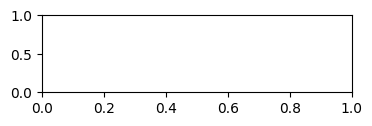

In [78]:
######################################
# Calculer le nombre de mois de stock #
######################################

#Création de la colonne Rotation de stock
# Mois de Stock = stock_quantity / total_sales # Warning mois d'octobre foire au vin donc referenciel de stock gonflé est donc potentiellement sur-évalué.
mois_de_stock = df_erp_liaison_web_filtered['stock_quantity'] / df_erp_liaison_web_filtered['total_sales']
# Map de correspondance avec la source df_erp_liaison_web_filtered et df_merge
#    Index = product_id, Valeur = mois_de_stock
lookup_map = pd.Series(
    mois_de_stock.values,
    index=df_erp_liaison_web_filtered['product_id']
)
df_merged['mois_de_stock'] = df_merged['product_id'].map(lookup_map)
print("Affichage de la colonne mois_de_stock : \n{}\n".format(df_merged['mois_de_stock']))

#Remplacement des "inf" par 0
mask = df_merged['mois_de_stock'] == float('inf')
df_merged.loc[mask, "mois_de_stock"] = 0
print("Affichage de la colonne mois_de_stock corrigée : \n{}\n".format(df_merged['mois_de_stock']))
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_merged_sorted_stock = df_merged.sort_values(by='mois_de_stock', ascending=False)
df_top20_ready = df_merged_sorted_stock.head(20).reset_index()

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
fig = px.bar(df_top20_ready,
             x='index',
             y='mois_de_stock',
             labels={'index': 'Top 20 Stocks', 'mois_de_stock': 'Mois de Stock'},
             text='product_id',
             hover_data=['price', 'product_id', 'total_sales'],
             color='price',
             height=400)
fig.update_xaxes(type='category')

fig.show()

In [54]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
# valorisation_stock_euros = stock_quantity * price
valorisation_stock_euros = df_erp_liaison_web_filtered['stock_quantity'] * df_erp_liaison_web_filtered['price']
# Map de correspondance avec la source df_erp_liaison_web_filtered et df_merge
#    Index = product_id, Valeur = valorisation_stock_euros
lookup_map = pd.Series(
    valorisation_stock_euros.values,
    index=df_erp_liaison_web_filtered['product_id']
)
df_merged['valorisation_stock_euros'] = df_merged['product_id'].map(lookup_map)
print("Affichage de la colonne valorisation_stock_euros : \n{}\n".format(df_merged['valorisation_stock_euros']))
#Calculer la somme de la colonne "Valorisation_stock_euros"
print("La somme de la colonne valorisation_stock_euros est : {}".format(df_merged['valorisation_stock_euros'].sum()))

Affichage de la colonne valorisation_stock_euros : 
0          0.0
1      18747.4
2      10096.5
3       1400.8
4       1840.0
        ...   
709        0.0
710        0.0
711        0.0
712        0.0
713        0.0
Name: valorisation_stock_euros, Length: 714, dtype: float64

La somme de la colonne valorisation_stock_euros est : 494637.9


In [55]:
##############################################
# Valorisation du nombre de produits en stock #
##############################################

#Calculer la somme de la colonne stock quantity
print("La somme de la colonne stock_quantity est : {}".format(df_erp_liaison_web_filtered['stock_quantity'].sum()))

La somme de la colonne stock_quantity est : 16740


###Etape 5.4 - Analyse du taux de marge

D'après la réglementation français la vente de vin sur le territoire français par une entreprise est soumis à la tva de 20% et il est d'usage en france d'afficher les prix TTC donc je pars du principe que la colonne price correspond au prix TTC.

In [89]:
############################
# Analyse du taux de marge #
############################

# Map de correspondance avec la source df_erp_liaison_web_filtered et df_merge
#    Index = product_id, Valeur = purchase_price
lookup_map = pd.Series(
    df_erp_liaison_web_filtered['purchase_price'].values,
    index=df_erp_liaison_web_filtered['product_id']
)
df_merged['purchase_price'] = df_merged['product_id'].map(lookup_map)
print("Affichage de la colonne purchase_price : \n{}\n".format(df_merged['purchase_price']))

#Création de la colonne Prix HT
prix_ht = df_merged['price'] / 1.2
df_merged['prix_ht'] = prix_ht
print("Affichage de la colonne prix_ht : \n{}\n".format(df_merged['prix_ht']))
#Création de la colonne Taux de marge  et marge brut
marge_brut = df_merged['prix_ht'] - df_merged['purchase_price']
df_merged['marge_brut'] = marge_brut
print("Affichage de la colonne marge_brut : \n{}\n".format(df_merged['marge_brut']))
taux_marge = (df_merged['marge_brut'] / df_merged['prix_ht']) * 100
df_merged['taux_marge'] = taux_marge
print("Affichage de la colonne taux_marge : \n{}\n".format(df_merged['taux_marge']))

#Afficher le prix minimum de la colonne "taux_marge"
print("\nTaux de marge minimum: {}".format(df_merged['taux_marge'].min()))
#Afficher le prix maximum de la colonne "taux_marge"
print("\nTaux de marge minimum: {}".format(df_merged['taux_marge'].max()))

Affichage de la colonne purchase_price : 
0      137.81
1      116.06
2       45.91
3       21.71
4       59.42
        ...  
709     10.64
710     20.51
711     14.05
712      2.97
713     29.45
Name: purchase_price, Length: 714, dtype: float64

Affichage de la colonne prix_ht : 
0      187.500000
1      159.416667
2       66.250000
3       34.333333
4       95.833333
          ...    
709     17.333333
710     33.750000
711     22.666667
712      4.833333
713     50.000000
Name: prix_ht, Length: 714, dtype: float64

Affichage de la colonne marge_brut : 
0      49.690000
1      43.356667
2      20.340000
3      12.623333
4      36.413333
         ...    
709     6.693333
710    13.240000
711     8.616667
712     1.863333
713    20.550000
Name: marge_brut, Length: 714, dtype: float64

Affichage de la colonne taux_marge : 
0      26.501333
1      27.197073
2      30.701887
3      36.766990
4      37.996522
         ...    
709    38.615385
710    39.229630
711    38.014706
712    38.551

In [57]:
#Affichage de la ligne avec un taux de marge inférieur à 0
mask = df_merged['taux_marge'] < 0
df_merged[mask]

,index,product_id,price,total_sales,ca_par_article,ca_prop,sales_prop,mois_de_stock,valorisation_stock_euros,purchase_price,prix_ht,marge_brut,taux_marge
692,210,4355,12.65,0.0,0.0,0.0,0.0,0.0,1227.05,77.48,10.541667,-66.938333,-634.988142


In [58]:
#Création d'un dataframe avec les taux positifs
df_marge_positive = df_merged[df_merged['taux_marge'] > 0]
#Afficher le prix minimum de la colonne "taux_marge"
print("\nTaux de marge minimum: {}".format(df_marge_positive['taux_marge'].min()))
#Afficher le prix maximum de la colonne "taux_marge"
print("\nTaux de marge minimum: {}".format(df_marge_positive['taux_marge'].max()))



Taux de marge minimum: 22.77862595419847

Taux de marge minimum: 47.7568


In [59]:
# Ajout de la colonne type de produit a df_merge_positive
lookup_map = pd.Series(
    df_erp_liaison_web_filtered['product_type'].values,
    index=df_erp_liaison_web_filtered['product_id']
)
df_marge_positive['product_type'] = df_merged['product_id'].map(lookup_map)
print("Affichage de la colonne product_type : \n{}\n".format(df_marge_positive['product_type']))

Affichage de la colonne product_type : 
0      Champagne
1      Champagne
2      Champagne
3            Vin
4            Vin
         ...    
709          Vin
710          Vin
711          Vin
712          Vin
713          Vin
Name: product_type, Length: 713, dtype: object



/tmp/ipython-input-3016852733.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
#Création d'un dataframe avec le taux de marge moyen par type de produit
df_marge_positive_by_product_type = df_marge_positive.groupby('product_type')['taux_marge'].mean().reset_index()
df_marge_positive_by_product_type.head(5)

# Round the 'taux_marge' column in place
df_marge_positive_by_product_type['taux_marge'] = df_marge_positive_by_product_type['taux_marge'].round(2)

#Affichage dans un graphique du taux de marge par type de produit
fig = px.bar(
                df_marge_positive_by_product_type,
                x='product_type',
                y='taux_marge',
                labels={'product_type': 'Type de produit', 'taux_marge': 'Taux de Marge en %'},
                title='Relation entre le produit et marge',
                text='taux_marge',  # Use the rounded 'taux_marge' column for text
                hover_data=['taux_marge', 'product_type'],
                color='taux_marge',
                height=400
                )

fig.show()

###Etape 5.5 - Analyse des corrélations entre les variables stock, sales et price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           714 non-null    int64  
 1   product_id      714 non-null    int64  
 2   price           714 non-null    float64
 3   total_sales     714 non-null    float64
 4   ca_par_article  714 non-null    float64
 5   mois_de_stock   692 non-null    float64
 6   purchase_price  714 non-null    float64
 7   prix_ht         714 non-null    float64
 8   marge_brut      714 non-null    float64
 9   taux_marge      714 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 55.9 KB


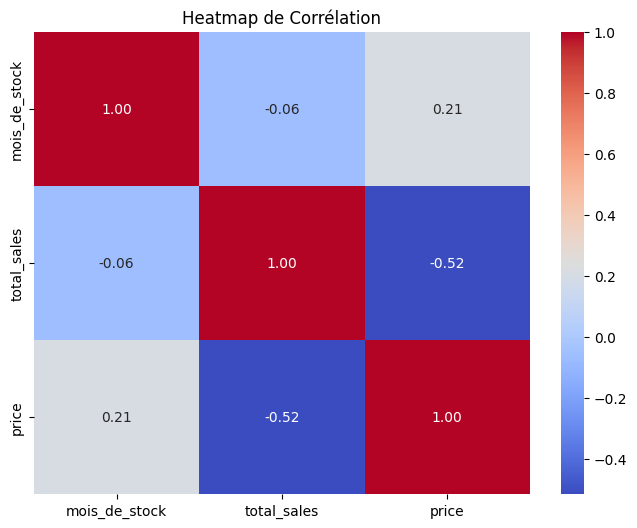

In [90]:
############################
# Analyse des corrélations #
############################

#Importation de Seaborn

import seaborn as sns
import matplotlib.pyplot as plt

#Création d'une heatmap de corrélation avec les variables stock, sales et price
df_merged.info()
df_analyse = df_merged[['mois_de_stock', 'total_sales', 'price']]
corr_matrix = df_analyse.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Heatmap de Corrélation')
plt.show()



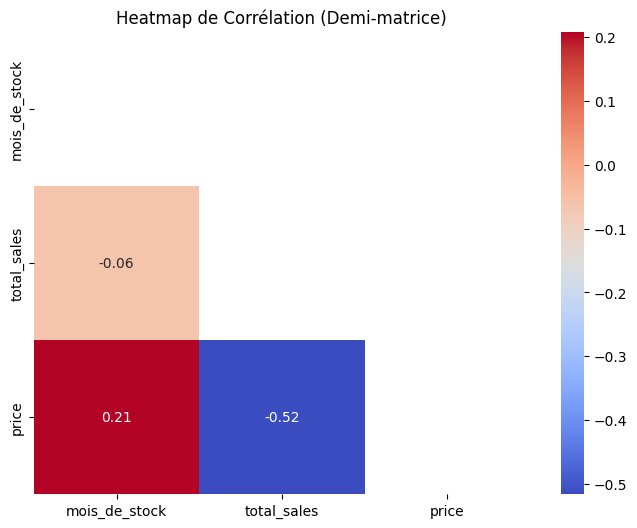

In [92]:
#On peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Heatmap de Corrélation (Demi-matrice)')
plt.show()

#### Que peut-on conclure des corrélations ?

🔵 Leçon 1 (La plus importante) : total_sales vs price = -0.52
Ce que ça veut dire : C'est une corrélation négative modérée (la case est bien bleue).

En français : Quand votre prix augmente, vos ventes totales diminuent.

Conclusion : C'est parfaitement logique et c'est la loi de la demande. Vos vins les plus chers sont (en moyenne) ceux qui se vendent le moins en quantité.

⚪ Leçon 2 : mois_de_stock vs price = 0.21
Ce que ça veut dire : C'est une corrélation positive très faible (la case est gris clair, proche de 0).

En français : Quand le prix augmente, les mois de stock ont très légèrement tendance à augmenter aussi.

Conclusion : Cela s'explique par la Leçon 1. Si les produits chers se vendent moins, il est logique qu'ils restent un peu plus longtemps en stock (donc les mois_de_stock augmentent).

⚪ Leçon 3 : mois_de_stock vs total_sales = -0.06
Ce que ça veut dire : C'est une corrélation quasi-nulle (la case est presque blanche, très proche de 0).

En français : Savoir qu'un produit se vend beaucoup (total_sales) ne vous dit rien sur son nombre de mois_de_stock.

Conclusion : C'est l'info la plus intéressante. Vous pourriez penser que "hautes ventes = bas stock en mois", mais ce n'est pas le cas. Pourquoi ?

Un produit "A" (top vente) : 1000 ventes / 5000 en stock = 5 mois de stock.

Un produit "B" (flop) : 10 ventes / 50 en stock = 5 mois de stock.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           714 non-null    int64  
 1   product_id      714 non-null    int64  
 2   price           714 non-null    float64
 3   total_sales     714 non-null    float64
 4   ca_par_article  714 non-null    float64
 5   mois_de_stock   692 non-null    float64
 6   purchase_price  714 non-null    float64
 7   prix_ht         714 non-null    float64
 8   marge_brut      714 non-null    float64
 9   taux_marge      714 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 55.9 KB


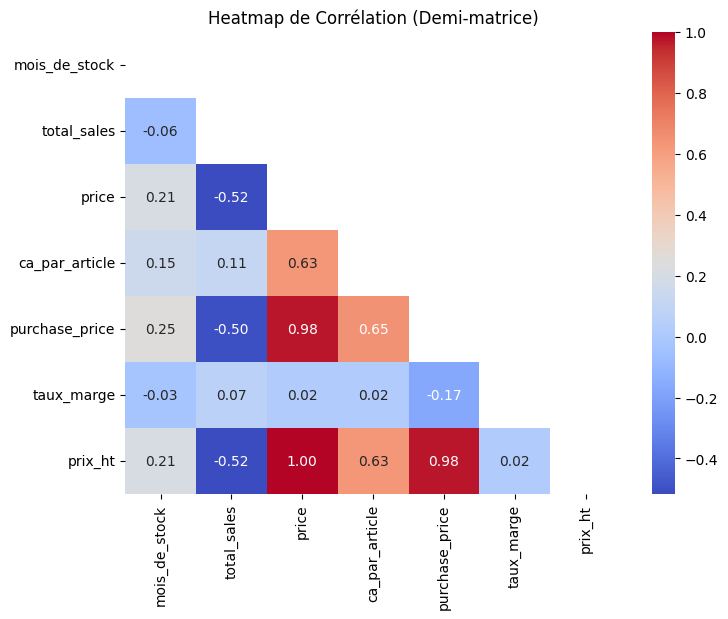

In [94]:
#Création d'une heatmap de corrélation avec les variables stock, sales et price
df_merged.info()
df_analyse = df_merged[['mois_de_stock', 'total_sales',
                        'price','ca_par_article','purchase_price','taux_marge',
                        'prix_ht']]
corr_matrix = df_analyse.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Heatmap de Corrélation (Demi-matrice)')
plt.show()

###Etape 5.6 - Mise à disposition de la nouvelle table sur un fichier Excel

In [63]:
#Mettre le dataset df_merge sur un fichier Excel
with pd.ExcelWriter('Bottleneck_Data_analytic_output.xlsx') as writer:
    df_erp_liaison_web_filtered.to_excel(writer, sheet_name='filtered_src_data', index=False)
    df_merged.to_excel(writer, sheet_name='glbl_analytic_data', index=False)
    top_performers.to_excel(writer, sheet_name='top_performers', index=False)
    df_top20_ready.to_excel(writer, sheet_name='mois_de_stock', index=False)
    df_marge_positive_by_product_type.to_excel(writer, sheet_name='marge_y_product', index=False)

